Names of the team members:

Pravanith reddy Kankanala

Supraja Medicherla

Venkata Sai Pallavi Pallapolu

In [167]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [168]:
import urllib.request
url = 'https://raw.githubusercontent.com/vpallapolu/HDS5230_InClass/main/Extra_credit/data/health_activity_data.csv'
filename = 'health_activity_data.csv'
urllib.request.urlretrieve(url, filename)
data = pd.read_csv(filename)
data.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [169]:
data.describe()

,ID,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.573000
std,288.819436,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.852509
min,1.000000,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000
25%,250.750000,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.000000
50%,500.500000,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,5.000000
75%,750.250000,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.000000
max,1000.000000,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.000000


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null   object 
 13  Alco

In [171]:
data.isnull().sum()

ID                              0
Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Blood_Pressure                  0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Diabetic                        0
Heart_Disease                   0
dtype: int64

Dropping unnecessary columns

In [172]:
import numpy
data= data = data.drop(['BMI', 'ID'], axis=1)
data.head()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,56,Male,164,81,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,69,Male,156,82,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,46,Female,158,65,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,32,Male,197,87,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,60,Male,157,63,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


categorizing male and female to 0 and 1

In [173]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [174]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [175]:
data['Hypertension'] = data['Blood_Pressure'].apply(lambda bp: 1 if int(bp.split('/')[0]) > 120 or int(bp.split('/')[1]) > 80 else 0)
data = data.drop(['Blood_Pressure'], axis=1)
data.head()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension
0,56,1,164,81,5134,1796,8.6,102,8.1,No,7,No,No,1
1,69,1,156,82,12803,1650,4.5,103,3.7,No,7,No,No,1
2,46,0,158,65,16408,1756,4.3,74,3.2,Yes,0,No,No,1
3,32,1,197,87,18420,2359,4.1,116,8.5,No,5,No,No,1
4,60,1,157,63,17351,2556,5.1,111,8.5,Yes,8,No,No,0


encode diabetic, heart disease, and smoker


In [176]:
for col in ['Smoker', 'Diabetic', 'Heart_Disease']:
    data[col] = LabelEncoder().fit_transform(data[col])
data.head()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension
0,56,1,164,81,5134,1796,8.6,102,8.1,0,7,0,0,1
1,69,1,156,82,12803,1650,4.5,103,3.7,0,7,0,0,1
2,46,0,158,65,16408,1756,4.3,74,3.2,1,0,0,0,1
3,32,1,197,87,18420,2359,4.1,116,8.5,0,5,0,0,1
4,60,1,157,63,17351,2556,5.1,111,8.5,1,8,0,0,0


In [177]:
data.shape

(1000, 14)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Height_cm'}>,
        <Axes: title={'center': 'Weight_kg'}>],
       [<Axes: title={'center': 'Daily_Steps'}>,
        <Axes: title={'center': 'Calories_Intake'}>,
        <Axes: title={'center': 'Hours_of_Sleep'}>,
        <Axes: title={'center': 'Heart_Rate'}>],
       [<Axes: title={'center': 'Exercise_Hours_per_Week'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Alcohol_Consumption_per_Week'}>,
        <Axes: title={'center': 'Diabetic'}>],
       [<Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Hypertension'}>, <Axes: >, <Axes: >]],
      dtype=object)

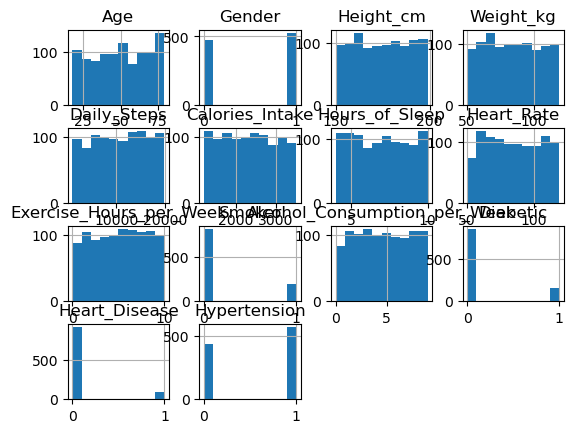

In [178]:
data.hist()

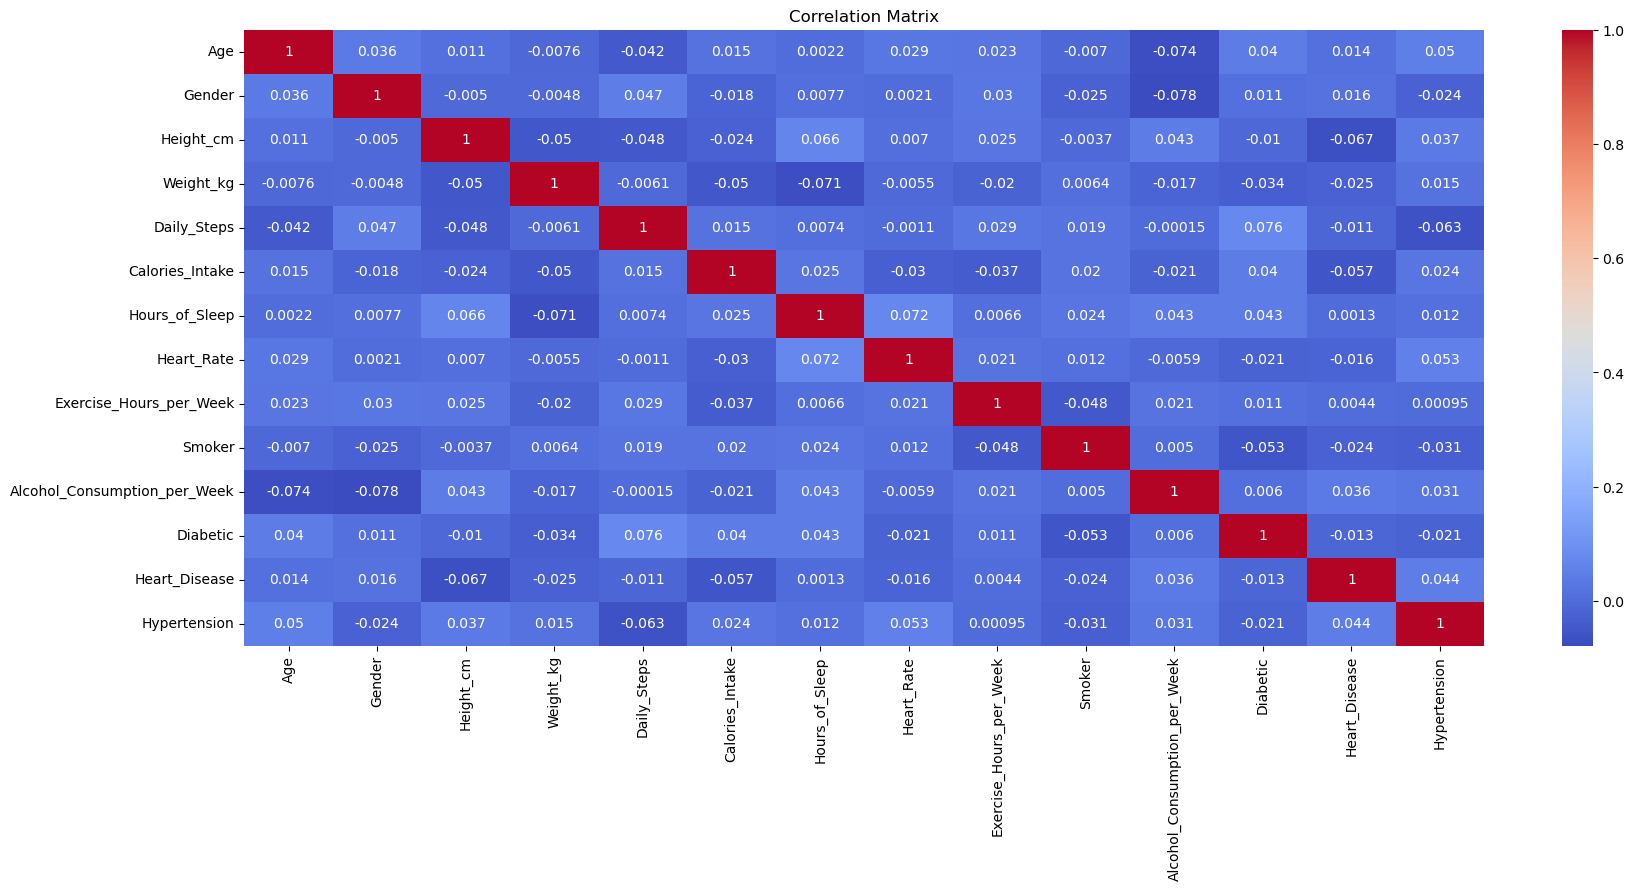

In [179]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [180]:
data.head()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension
0,56,1,164,81,5134,1796,8.6,102,8.1,0,7,0,0,1
1,69,1,156,82,12803,1650,4.5,103,3.7,0,7,0,0,1
2,46,0,158,65,16408,1756,4.3,74,3.2,1,0,0,0,1
3,32,1,197,87,18420,2359,4.1,116,8.5,0,5,0,0,1
4,60,1,157,63,17351,2556,5.1,111,8.5,1,8,0,0,0


In [181]:
data.describe()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,0.523000,174.74500,84.35200,10717.034000,2327.117000,6.90990,84.710000,5.045500,0.191000,4.573000,0.155000,0.093000,0.566000
std,18.114267,0.499721,14.54192,20.06596,5444.707891,657.847942,1.77964,20.130155,2.847801,0.393286,2.852509,0.362086,0.290578,0.495873
min,18.000000,0.000000,150.00000,50.00000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,162.00000,68.00000,6028.250000,1745.750000,5.30000,67.000000,2.675000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,175.00000,84.00000,10898.000000,2328.500000,6.90000,84.000000,5.100000,0.000000,5.000000,0.000000,0.000000,1.000000
75%,66.000000,1.000000,187.00000,101.00000,15253.250000,2880.000000,8.40000,103.000000,7.600000,0.000000,7.000000,0.000000,0.000000,1.000000
max,79.000000,1.000000,199.00000,119.00000,19931.000000,3498.000000,10.00000,119.000000,10.000000,1.000000,9.000000,1.000000,1.000000,1.000000


In [182]:
def calculate_health_risk(row):
    score = 0
    # Daily Steps
    if row['Daily_Steps'] < 5000:
        score += 2
    elif row['Daily_Steps'] < 10000:
        score += 1
    # Calories
    if row['Calories_Intake'] > 2500:
        score += 2
    elif row['Calories_Intake'] > 2000:
        score += 1
    # Sleep
    if row['Hours_of_Sleep'] <= 7 or row['Hours_of_Sleep'] > 9:
        score += 2
    else:
        score += 0  # Sleep is within healthy range (>7 and <=9)
    # Heart Rate
    if row['Heart_Rate'] < 60 or row['Heart_Rate'] > 85:
        score += 2
    else:
        score += 0
    # Exercise
    if row['Exercise_Hours_per_Week'] < 3:
        score += 2
    elif row['Exercise_Hours_per_Week'] < 5:
        score += 1
    else:
        score += 0
    # Alcohol (Gender-specific)
    if row['Gender'] == 0:  # Female
        if row['Alcohol_Consumption_per_Week'] > 7:
            score += 2
        else:
            score += 0
    else:  # Male
        if row['Alcohol_Consumption_per_Week'] > 14:
            score += 2
        else:
            score += 0
    return score

In [183]:
def classify_health_risk(score):
    if score <= 4:
        return 0  # Low
    elif score <= 6:
        return 1  # Medium
    else:
        return 2  # High

In [184]:
data['Health_Risk'] = data.apply(calculate_health_risk, axis=1)
data['Health_Risk_Score'] = data['Health_Risk'].apply(classify_health_risk)

In [185]:
data.describe()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension,Health_Risk,Health_Risk_Score
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,0.523000,174.74500,84.35200,10717.034000,2327.117000,6.90990,84.710000,5.045500,0.191000,4.573000,0.155000,0.093000,0.566000,5.300000,0.893000
std,18.114267,0.499721,14.54192,20.06596,5444.707891,657.847942,1.77964,20.130155,2.847801,0.393286,2.852509,0.362086,0.290578,0.495873,2.043569,0.795099
min,18.000000,0.000000,150.00000,50.00000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,162.00000,68.00000,6028.250000,1745.750000,5.30000,67.000000,2.675000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,50.000000,1.000000,175.00000,84.00000,10898.000000,2328.500000,6.90000,84.000000,5.100000,0.000000,5.000000,0.000000,0.000000,1.000000,5.000000,1.000000
75%,66.000000,1.000000,187.00000,101.00000,15253.250000,2880.000000,8.40000,103.000000,7.600000,0.000000,7.000000,0.000000,0.000000,1.000000,7.000000,2.000000
max,79.000000,1.000000,199.00000,119.00000,19931.000000,3498.000000,10.00000,119.000000,10.000000,1.000000,9.000000,1.000000,1.000000,1.000000,12.000000,2.000000


In [186]:
data.head()

,Age,Gender,Height_cm,Weight_kg,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease,Hypertension,Health_Risk,Health_Risk_Score
0,56,1,164,81,5134,1796,8.6,102,8.1,0,7,0,0,1,3,0
1,69,1,156,82,12803,1650,4.5,103,3.7,0,7,0,0,1,5,1
2,46,0,158,65,16408,1756,4.3,74,3.2,1,0,0,0,1,3,0
3,32,1,197,87,18420,2359,4.1,116,8.5,0,5,0,0,1,5,1
4,60,1,157,63,17351,2556,5.1,111,8.5,1,8,0,0,0,6,1


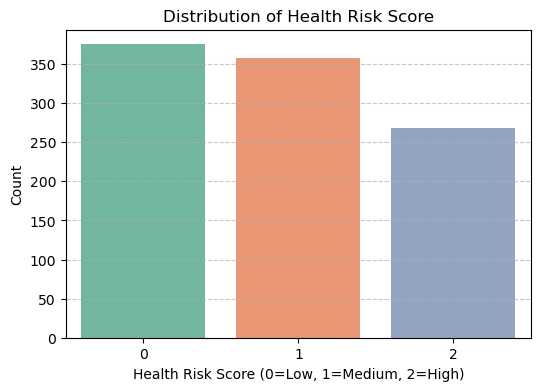

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Health_Risk_Score', hue='Health_Risk_Score', data=data, palette='Set2', legend=False)
plt.title("Distribution of Health Risk Score")
plt.xlabel("Health Risk Score (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**model fitting**

In [188]:
data.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease', 'Hypertension', 'Health_Risk',
       'Health_Risk_Score'],
      dtype='object')

In [189]:
# Check for any remaining non-numeric columns (besides the target and the columns to exclude)
# You might need to convert other columns such as Age, Height, Weight, etc. if they are still non-numeric
X = data.drop(columns=['Health_Risk_Score', 'Health_Risk', 'Hypertension'])  # Drop the target and outcome variables
# Ensure all features in X are numeric
#X = pd.get_dummies(X, drop_first=True)  # This handles any remaining categorical columns (like if there are non-binary categories)
y = data['Health_Risk_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xg_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# Train the model
xg_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:35:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [191]:
# Predict the target variable on the test set
y_pred_xg = xg_model.predict(X_test)

In [192]:
# Evaluate the model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_xg, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_xg, average='weighted', zero_division=0))

XGBoost Performance:
Accuracy: 0.84
Precision: 0.8427137821456337
Recall: 0.84
F1 Score: 0.8405441010602301


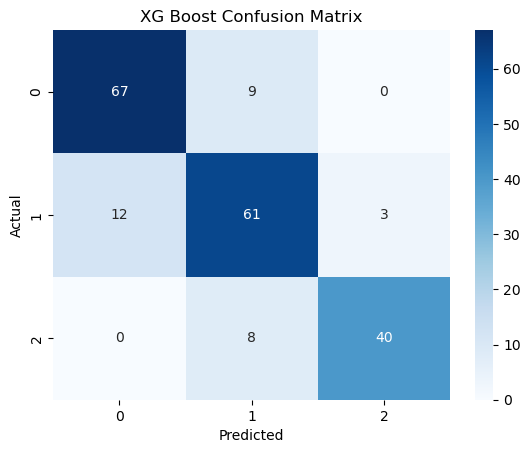

In [193]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Blues')
plt.title("XG Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [194]:
import joblib
joblib.dump(xg_model, "XG_Boost_model.pkl")

['XG_Boost_model.pkl']

In [195]:
X_train.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease'],
      dtype='object')